## In this notebook we will analyze the robustness of the collaboration network of the September 11th, 2001 hijackers and their accomplices. 

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [25]:
#our data source is Valdis Krebs:
#Krebs, Valdis E. "Mapping networks of terrorist cells." Connections 24.3 (2002): 43-52.

G=nx.read_edgelist('terrorists/terrorist.pairs')

In [34]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 152
Average degree:   4.9032


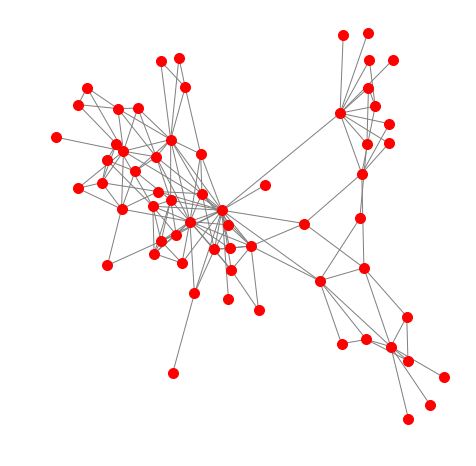

In [35]:
plt.figure(figsize=(6,6))
nx.draw(G,node_size=100,edge_color='grey')

In [46]:
#define functions to carry out a random attack and targeted attack
def random_attack(G):
    nodes = [i for i in G.nodes()]
    x = random.randint(0,len(nodes)-1)
    G.remove_node(nodes[x])
    return G

def target_attack(G):
    deg_seq = sorted([(n,d) for n,d in G.degree()],reverse = True, key = lambda x : x[1])
    seq = [n for n, d in deg_seq]
    G.remove_node(seq[0])
    return G

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

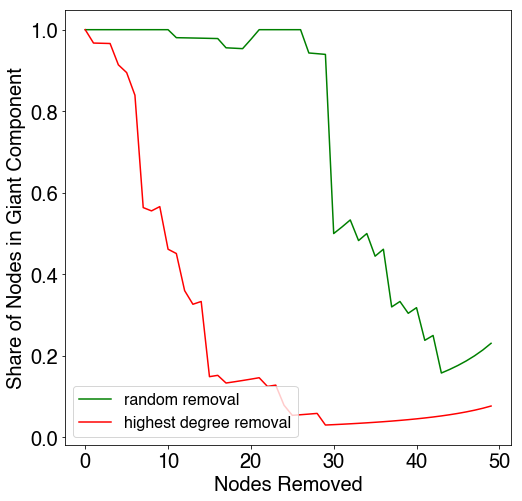

In [62]:
#Share of nodes in the giant component after random attacks
rep = 50 #num of iterations
share_rand = []
H = G.copy()
N = H.number_of_nodes()

for i in range(rep):
    #For the computation of the giant component use undirected graph
    gc = max(nx.connected_component_subgraphs(H), key = len)
    share_rand.append(nx.number_of_nodes(gc)/N)
    H = random_attack(H)
    N -= 1
    
#Share of nodes in the giant component after removing highest degree nodes
share_t = []
D = G.copy()
N = D.number_of_nodes()

for i in range(rep):
    #For the computation of the giant component use undirected graph
    gc = max(nx.connected_component_subgraphs(D), key = len)
    share_t.append(nx.number_of_nodes(gc)/N)
    D = target_attack(D)
    N -= 1
    
plt.figure(figsize=(8,8))
plt.plot([x for x in share_rand],label='random removal',color='green')
plt.plot([x for x in share_t],label='highest degree removal',color='red')
plt.ylabel('Share of Nodes in Giant Component',size=20)
plt.xlabel('Nodes Removed',size=20)
plt.legend(prop={'size': 16})
plt.xticks(size=20)
plt.yticks(size=20)
    

### Run the code a few times and note that the random attack curve changes, but the targetted attack doesn't - why?

## 1) Repeat the random attack process one hundred times and plot the average share of nodes in the giant component over all the reptitions.

## 2) Create a new attack method by targetting the nodes by their betweenness centrality. Is this a more effective attach method to disconnect the network?

## 3) Create a configuration model version of the terrorist network, plot it as we did above, and then rerun the robustness analysis on the randomized network. Is the degree-preserving randomization more or less robust to random/targetted attack?